# Lab 9: Grid Localization using Bayes Filter on the Virtual Robot

#### <span style="color:rgb(0,150,0)">It is recommended that you close any heavy-duty applications running on your system while working on this lab.</span>

#### This notebook showcases localization results of the **Localization** module (defined in *robot_interface.py*) for the virtual robot.

<hr>


In [1]:
# Automatically reload changes in python modules
%load_ext autoreload
%autoreload 2

# Import classes
from robot_interface import *

import time
import numpy as np
import rospy
from Traj import Trajectory

In [2]:
from gridmap import OccupancyGridMap
import matplotlib.pyplot as plt
from a_star import a_star
from utils import plot_path

In [3]:
# Instantiate VirtualRobot to communicate with the real robot
robot = VirtualRobot()

# Instantiate Mapper
# Start points for each line segment describing the map
start_points = np.array([[0,0],
                         [3.04,0],
                         [3.04,3.04],
                         [0,3.04],
                         [0,0],
                         [0,0.608],
                         [0.608,0.608],
                         [0.608,0.912],
                         [0,0.912],
                         [0,2.128],
                         [1.216,2.128],
                         [1.216,1.52],
                         [2.584,1.52],
                         [2.584,0.912],
                         [1.52,0.304]])

# End points for each line segment describing the map
end_points = np.array([  [3.04,0],
                         [3.04,3.04],
                         [0,3.04],
                         [0,0],
                         [0,0.608],
                         [0.608,0.608],
                         [0.608,0.912],
                         [0,0.912],
                         [0,2.128],
                         [1.216,2.128],
                         [1.216,1.52],
                         [2.584,1.52],
                         [2.584,0.912],
                         [1.52,0.304],
                         [0,0]])

# Requires a RealRobot object as input
mapper = Mapper(min_x=0, max_x=3.04, min_y=0, max_y=3.04, min_a=-180, max_a=180,
                cell_size_x=0.152, cell_size_y=0.152, cell_size_a=20,
                max_cells_x=20, max_cells_y=20, max_cells_a=18,
                ray_length=7, lines=[start_points, end_points], obs_per_cell=18, 
                robot=robot)
#mapper.populate_views()

# Instantiate Localization 
odom_trans_sigma = 0.33
odom_rot_sigma = 15
sensor_sigma = 0.11

# Requires a RealRobot object and a Mapper object as inputs
loc = Localization(robot, mapper, sensor_sigma, odom_trans_sigma, odom_rot_sigma)

# Visualize the map (described using line segments) in the plotter
loc.plotter.visualize_map()

Using python version: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0] 

Initializing Node
Initializing Virtual Robot
Initializing beliefs with a Uniform Distribution
Uniform Belief with each cell value:  0.0001388888888888889


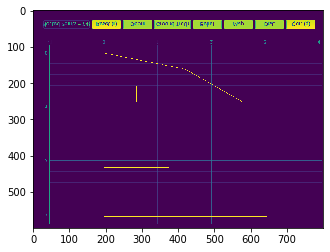

In [4]:
import subprocess

subprocess.run(["/bin/bash","-c", "wmctrl -a 'Plotter'"])
subprocess.run(["/bin/bash","-c","scrot -d 4 -u -quality 100 map.png"])
gmap = OccupancyGridMap.from_png('map.png', 1)
gmap.plot()

In [5]:
#robot.get_gt_pose()
robot.get_laser_data()

6.0

In [6]:
def check_front(robot):
    return robot.get_laser_data() < 0.2

def move_to_next(currPos, nextPos, robot):
    print(str(currPos) + " to " + str(nextPos))
    #while(round(robot.get_gt_pose()[0],2) != nextPos[0] and round(robot.get_gt_pose()[1],2) != nextPos[1]):
    print(robot.get_gt_pose())
    if(currPos[0]>nextPos[0]): #moving left
        print("moving left")
        #print(robot.get_gt_pose())
        nextAng = 180;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ 180")
        while(round(robot.get_gt_pose()[0],2) > nextPos[0]): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    if(currPos[0]<nextPos[0]): #moving right
        print("moving right")
        #print(robot.get_gt_pose())
        nextAng = 0;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ 0")
        while(round(robot.get_gt_pose()[0],2) < nextPos[0]): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    if(currPos[1]>nextPos[1]): #moving down
        print("moving down")
        #print(robot.get_gt_pose())
        nextAng = -90;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ -90")
        while(round(robot.get_gt_pose()[1],2) > nextPos[1] and (not check_front(robot))): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    if(currPos[1]<nextPos[1]): #moving up
        print("moving up")
        #print(robot.get_gt_pose())
        nextAng = 90;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ 90")
        while(round(robot.get_gt_pose()[1],2) < nextPos[1] and (not check_front(robot))): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    print("DONE WITH STEP")
    robot.set_vel(0,0)

Start cell:  (8, 10)
Goal cell:  (15, 4)


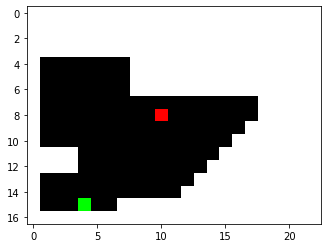

-----------------
4, 1
(1, 1, 0) to (0.152, 1.976, 0)
(1.0, 1.0, 0.0)
moving left
moving up
DONE WITH STEP
4, 2
(0.152, 1.976, 0) to (0.304, 1.976, 0)
(0.15390306901663475, 1.9813459868188323, 89.7718691776937)
moving right
DONE WITH STEP
4, 3
(0.304, 1.976, 0) to (0.45599999999999996, 1.976, 0)
(0.31389982224943047, 1.980326695415995, -0.36500931569121176)
moving right
DONE WITH STEP
4, 4
(0.45599999999999996, 1.976, 0) to (0.608, 1.976, 0)
(0.46389677840517646, 1.979371109725835, -0.36500931569121176)
moving right
DONE WITH STEP
5, 4
(0.608, 1.976, 0) to (0.608, 1.8239999999999998, 0)
(0.6138937345609218, 1.978415524035675, -0.36500931569121176)
moving down
DONE WITH STEP
6, 4
(0.608, 1.8239999999999998, 0) to (0.608, 1.672, 0)
(0.6140921993509888, 1.8184156471240767, -89.9289300139453)
moving down
DONE WITH STEP
7, 4
(0.608, 1.672, 0) to (0.608, 1.52, 0)
(0.6142782600916766, 1.6684157625194531, -89.9289300139453)
moving down
DONE WITH STEP
8, 4
(0.608, 1.52, 0) to (0.608, 1.36799999

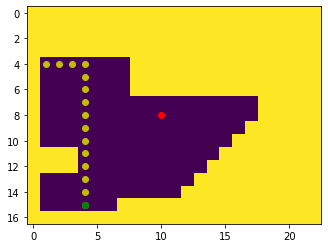

Start cell:  (14, 7)
Goal cell:  (9, 14)


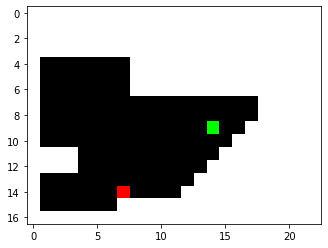

-----------------
4, 1
(1, 1, 0) to (0.152, 1.976, 0)
(0.6159776148566255, 0.2984168164638835, -89.9289300139453)
moving left


KeyboardInterrupt: 

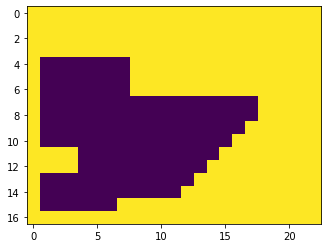

In [12]:
from planner_query import *

grid =  [ 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,
          1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,
          1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
grid = np.array(grid, dtype=np.uint8)
grid.resize(17,23)

# Instantiate the class PlannerQuery
pq = PlannerQuery(grid)
        
for i in range(0,10):
    # Generate a start and goal pair
    (start_node, goal_node) = pq.generate(plot=True)
    gmap = OccupancyGridMap.from_data(grid,1,1)
    gmap.plot()
    print("-----------------")
    path, path_px = a_star((4,1), goal_node, gmap,movement="4N")
    

    if path:
        # plot resulting path in pixels over the map
        #plot_path(path_px)
        path_arr = np.array(path)
        prevStep = (1,1,0)
        #nextStep = ((start_node[1])*0.152,(17-start_node[0])*0.152,0)
        #move_to_next(prevStep,nextStep,robot)
        #prevStep = nextStep
        for i in path_arr:
            print(str(i[0]) + ", " + str(i[1]))
            graphStep = ((i[1])*0.152,(17-i[0])*0.152, 0)
            loc.plotter.plot_point(graphStep[0], graphStep[1],GT)
            
            nextStep = ((i[1])*0.152,(17-i[0])*0.152,0)
            move_to_next(prevStep,nextStep,robot)
            loc.plotter.plot_point(robot.get_gt_pose()[0], robot.get_gt_pose()[1], GT)
            loc.plotter.plot_point(robot.get_pose()[0], robot.get_pose()[1], ODOM)
            prevStep = nextStep
        print("MOVE FROM " + str(start_node) + " TO " + str(goal_node) + " COMPLETE!")
        robot.set_vel(0,0)
        start_node_px = gmap.get_index_from_coordinates(start_node[0], start_node[1])
        goal_node_px = gmap.get_index_from_coordinates(goal_node[0], goal_node[1])

        plt.plot(path_arr[:, 1], path_arr[:, 0], 'yo')
        plt.plot(start_node_px[1], start_node_px[0], 'ro')
        plt.plot(goal_node_px[1], goal_node_px[0], 'go')
    else:
        print('Goal is not reachable')

        # plot start and goal points over the map (in pixels)
        start_node_px = gmap.get_index_from_coordinates(start_node[0], start_node[1])
        goal_node_px = gmap.get_index_from_coordinates(goal_node[0], goal_node[1])

        plt.plot(start_node_px[1], start_node_px[0], 'ro')
        plt.plot(goal_node_px[1], goal_node_px[0], 'go')

    plt.show()

In [8]:
cx,cy,ca = mapper.to_map(0,2.128,0)
#mapper.get_views(cx,cy,ca)
for i in range(0,start_points.shape[0]):
    get_sim_model(start_points[i],end_points[i])

model(pose [1.52 0.0 0 0.0] size [3.04 0.002 0.5])
model(pose [3.04 1.52 0 90.0] size [3.04 0.002 0.5])
model(pose [1.52 3.04 0 180.0] size [3.04 0.002 0.5])
model(pose [0.0 1.52 0 -90.0] size [3.04 0.002 0.5])
model(pose [0.0 0.304 0 90.0] size [0.608 0.002 0.5])
model(pose [0.304 0.608 0 0.0] size [0.608 0.002 0.5])
model(pose [0.608 0.76 0 90.0] size [0.30400000000000005 0.002 0.5])
model(pose [0.304 0.912 0 180.0] size [0.608 0.002 0.5])
model(pose [0.0 1.52 0 90.0] size [1.2160000000000002 0.002 0.5])
model(pose [0.608 2.128 0 0.0] size [1.216 0.002 0.5])
model(pose [1.216 1.824 0 -90.0] size [0.6080000000000001 0.002 0.5])
model(pose [1.9 1.52 0 0.0] size [1.368 0.002 0.5])
model(pose [2.584 1.216 0 -90.0] size [0.608 0.002 0.5])
model(pose [2.052 0.608 0 -150.25511870305778] size [1.2254631777413796 0.002 0.5])
model(pose [0.76 0.152 0 -168.6900675259798] size [1.5501019321322067 0.002 0.5])


# Bayes filter on the virtual robot
The cell below run the bayes filter algorithm for the pre-planned trajectory.

In [9]:
# Reset Plots
robot.reset()
loc.plotter.reset_plot()

# Init Uniform Belief
loc.init_pose()

# Get Observation Data by executing a 360 degree rotation motion
loc.get_observation_data()

# Run Update Step
loc.update_step()
loc.print_update_stats(plot_data=True)
    
# Intialize the Trajectory object
traj = Trajectory(loc)

# Run through each motion steps
for t in range(0, traj.total_time_steps):

    print("\n\n-----------------", t, "-----------------")
    
    prev_odom, current_odom, prev_gt, current_gt = traj.execute_time_step(t)
    
    # Prediction Step
    loc.prediction_step(current_odom, prev_odom)
    loc.print_prediction_stats(plot_data=True)
    
    # Get Observation Data by executing a 360 degree rotation motion
    loc.get_observation_data()
    
    # Update Step    
    loc.update_step()
    loc.print_update_stats(plot_data=True)
    
        
    print("-------------------------------------")

 | Resetting Robot pose
Initializing beliefs with a Uniform Distribution
Uniform Belief with each cell value:  0.0001388888888888889
 | Executing Observation Loop at: 30 deg/s
Update Step
     | Update Time:  0.02524590492248535

---------- UPDATE STATS -----------
GT index      :  (16, 16, 8)
Bel index     :  (0, 0, 0) with prob =  nan
Bel_bar prob at index =  0.0001388888888888889

GT     : (1.000, 1.000, -0.000)
Belief   : (0.076, 0.076, -170.000)
POS ERROR : (0.924, 0.924, 170.000)
---------- UPDATE STATS -----------


----------------- 0 -----------------
 | Resetting Robot pose


/home/artemis/Desktop/ece4960/lab10/lab10_jupyter/scripts/robot_interface.py:570: RuntimeWarning: invalid value encountered in true_divide
  self.bel = self.bel / np.sum(self.bel)


Prediction Step
Uniform Belief with each cell value:  0.0
     | Prediction Time:  0.005663156509399414

---------- PREDICTION STATS -----------
GT index            :  (19, 15, 7)
Prior Bel index     :  (0, 0, 0) with prob =  nan
POS ERROR      : (1.313, 0.829, 147.655)


/home/artemis/Desktop/ece4960/lab10/lab10_jupyter/scripts/robot_interface.py:557: RuntimeWarning: invalid value encountered in true_divide
  self.bel_bar = self.bel_bar / np.sum(self.bel_bar)


---------- PREDICTION STATS -----------
 | Executing Observation Loop at: 30 deg/s


KeyboardInterrupt: 